<a href="https://colab.research.google.com/github/AnkitaPandey99/DS-ALGO-DAY1/blob/main/NETFLIX_EDA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA ON NETFLIX DATASET as of 2019**


### Importing the Important Libraries we will need.

In [29]:
# import modules 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

### Loading the CSV file of dataset using Pandas library and naming it as Flix_df

In [30]:
Flix_df = pd.read_csv("/content/netflix_titles_nov_2019.csv")

#### Checking the first five rows of data with head() to get a view of our dataset

In [31]:
Flix_df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


#### Checking more information of data using info()

In [32]:
Flix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


#### Getting the dimention of data by using shape() and Checking for NAN values in our dataFrame using isnull()

In [33]:
print("Dimention : ",Flix_df.shape)
print("-----------Missing Values-----------",Flix_df.isnull().sum())

Dimention :  (5837, 12)
-----------Missing Values----------- show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64


### After a View to our DataFrame We came to know that there are 5837 observations, 12 variables
### The dataset includes TV shows/Movies with their ratings and country etc.
### We could also Observe that there are Null values in some coulumns
# we will be working on categorical data

#  **Cleaning Our DataSet**  

###### Data Cleaning means the process of identifying incorrect, incomplete, inaccurate, irrelevant, or missing pieces of data and then modifying, replacing, or deleting them as needed. 
###Identifying Null Values in VAriables in our Dataset and replacing them

In [34]:
print('\nColumns with missing value:') 
print(Flix_df.isnull().any())


Columns with missing value:
show_id         False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
type            False
dtype: bool


#### We know that there are 5837 entries, 12 columns to work with for this EDA. There are a few columns that contain null values and they are :  director, cast, country, date_added and rating.

In [35]:
print("-----------Missing Values-----------",Flix_df.isnull().sum())

-----------Missing Values----------- show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64


In [36]:
print("Total Missing Values in our Dataset : ",Flix_df.isnull().sum().sum())

Total Missing Values in our Dataset :  3536


#### There are a total of 3536 null values across the entire dataset with 1901 missing points under “director” 556 under “cast,” 427 under “country,” 642 under “date_added,” and 10 under “rating.” We will handle all null data points before we can dive into EDA and modeling.

In [37]:
Flix_df.director.fillna("No Director", inplace=True)
Flix_df.cast.fillna("No Cast", inplace=True)
Flix_df.country.fillna("No Country", inplace=True)
Flix_df.date_added.fillna("No Date", inplace=True)
Flix_df.rating.fillna("NR", inplace=True)
# Flix_df.dropna(subset=["rating"], inplace=True)

In [38]:
# NOT WORKING
# filling missing values
# with meandian column values
r_df = Flix_df['rating']
r_df.fillna(r_df.mode(), inplace=True)

In [39]:
print("---------------Missing Values------------------",Flix_df.isnull().sum()) 
#  or Flix_df.isnull().any()
print("\nTotal Missing Values in our Dataset : ",Flix_df.isnull().sum().sum())


---------------Missing Values------------------ show_id         0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
type            0
dtype: int64

Total Missing Values in our Dataset :  0


### Now  Finally, we can see that there are no more missing values in our data frame.

# **EDA - Netflix Content By Type**
#### We are Comparinf Total number of TV shows and Movies by column "type" to know which is majority

In [40]:
#There are only two major types in netflix watch: TV Shows and Movies
val = Flix_df['type'].value_counts().index
cnt = Flix_df['type'].value_counts().values

fig = go.Figure([go.Bar(x=val, y=cnt, marker_color='limegreen')])
fig.update_layout(title_text='Number of Netflix Titles that are either Movies or TV Shows', title_x=0.5)
fig.show()

#### By this we can see that there are about 3939 movies and 1898 TV Shows and Movies are in Majority. So we observed there are more movies rows than that of TV Shows rows

## **Top Genres on Netflix**

In [41]:
Genres = Flix_df.listed_in.str.split(',', expand=True).stack().str.strip()
#Genres.unique()
top_Genres=Genres.value_counts()
ftop_genres = top_Genres.head(10)
#ftop_genres
val = Genres.value_counts().index 
fig = go.Figure([go.Bar(x=val, y=ftop_genres)])
fig.update_layout(title_text='Top 10 Genres on Netflix', title_x=0.5)


## **Top 10 content provider Contries on Netflix**


In [42]:
countries = Flix_df.country.str.split(',', expand=True).stack().str.strip()
countries = countries[countries != 'No Country']
countries.nunique()
top_countries=countries.value_counts()
final = top_countries.head(10)

val = countries.value_counts().index
fig = go.Figure([go.Bar(x=val, y=final)])
fig.update_traces(marker_color='lightcyan', marker_line_color='blue',
                  marker_line_width=1.8, opacity=0.8)
#fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide') 
fig.update_layout(title_text='Top 10 Countries on Netflix', title_x=0.5)
#fig.show()



# **Top 10 directors on Netflix**

In [43]:
Directors = Flix_df.director.str.split(',', expand=True).stack().str.strip()
Directors = Directors[Directors != 'No Director']
#Directors.nunique()
top_directors=Directors.value_counts()
ftop_directors = top_directors.head(10)
ftop_directors
value = Directors.value_counts().index 
fig = go.Figure([go.Bar(x=value, y=ftop_directors)])
fig.update_traces(marker_color='red', marker_line_color='maroon',
                  marker_line_width=1.8, opacity=0.7)
#fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide') 
fig.update_layout(title_text='Top 10 Directors on Netflix', title_x=0.5)
fig.show()



## **Top 10 Actors**

In [44]:
Actors = Flix_df.cast.str.split(',', expand=True).stack().str.strip()
# expand=True , the split elements will expand out into separate columns
Actors = Actors[Actors != 'No Cast']
#Actors.nunique()
top_Actors=Actors.value_counts()
ftop_Actors = top_Actors.head(10)
ftop_Actors
value = Actors.value_counts().index 
fig = go.Figure([go.Bar(x=value, y=ftop_Actors)])
fig.update_traces(marker_color='olive', marker_line_color='brown',
                  marker_line_width=1.8, opacity=0.7)
#fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide') 
fig.update_layout(title_text='Top 10 Actors on Netflix', title_x=0.5)
#fig.show()



## **Content as per Rating**

Text(0.5, 1.0, 'Content as per Ratings')

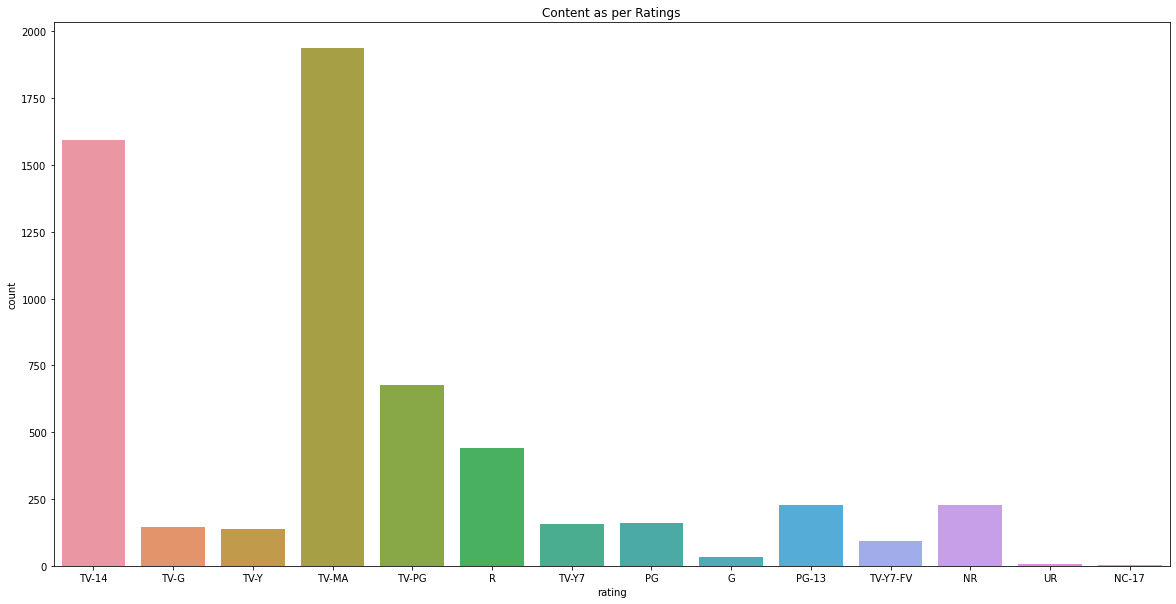

In [45]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(ax=ax, x="rating", data = Flix_df).set_title('Content as per Ratings')

##**Relation between Type and Rating of Movies and TV-Shows**

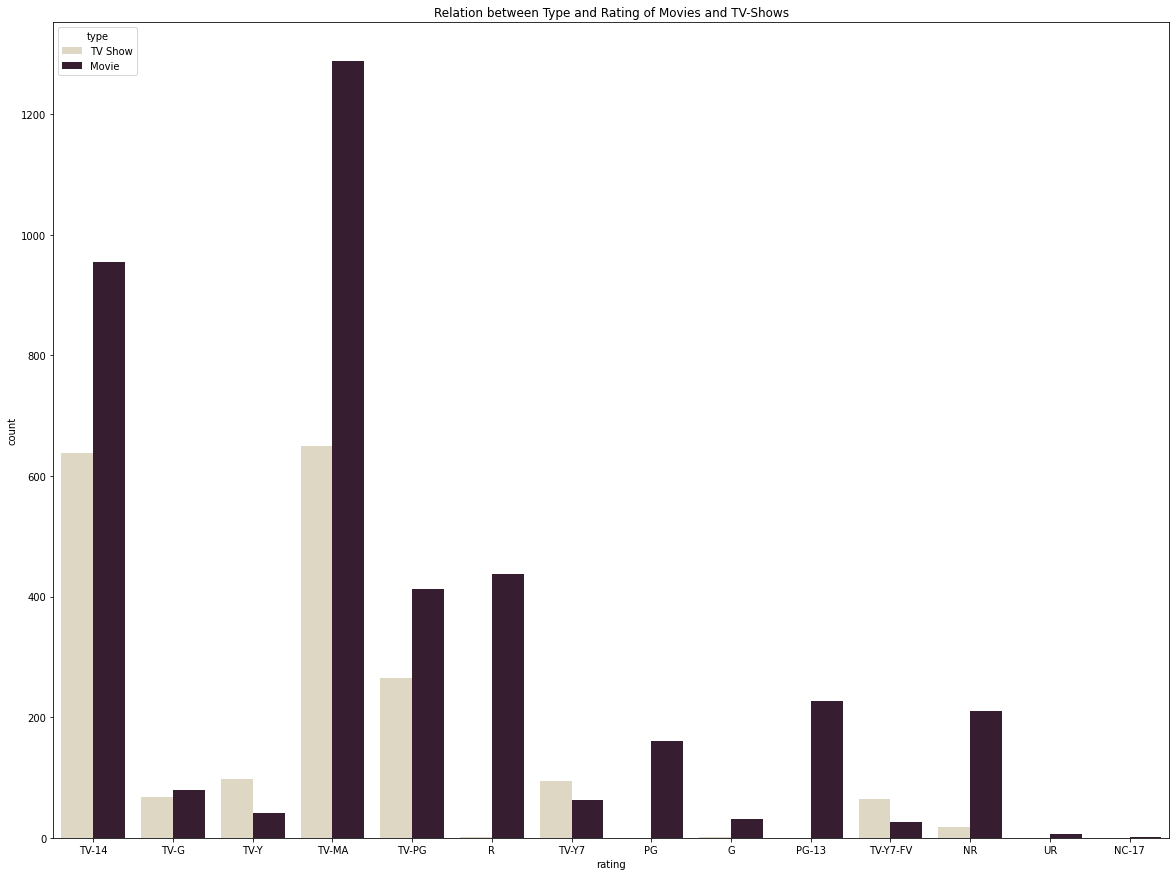

In [46]:
plt.figure(figsize=(20,15))
sns.countplot(x='rating',hue='type',data=Flix_df,palette="ch:.35")
plt.title('Relation between Type and Rating of Movies and TV-Shows')
plt.show();

#**Year Wise Content**

Text(0.5, 1.0, 'Year Wise Content')

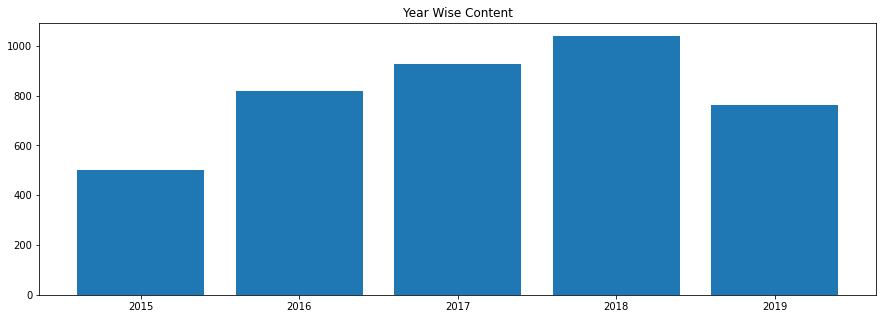

In [47]:
top_5_year = Flix_df.groupby('release_year').count().sort_values('title',ascending=False).head(5)
top_5_year.reset_index(inplace=True)
top_5_year
plt.figure(figsize=(15,5))
plt.bar(top_5_year.release_year,top_5_year.title);
plt.title('Year Wise Content')

# .groupby(col).count() should be used when you want to find the frequency of valid values present in columns with respect to specified col.
# .value_counts() should be used to find the frequencies of a series.

#VISUALIZATION OF CONTENT(TV/MOVIES) OF TOP 3 COUNTRIES - USA, INDIA, UK 


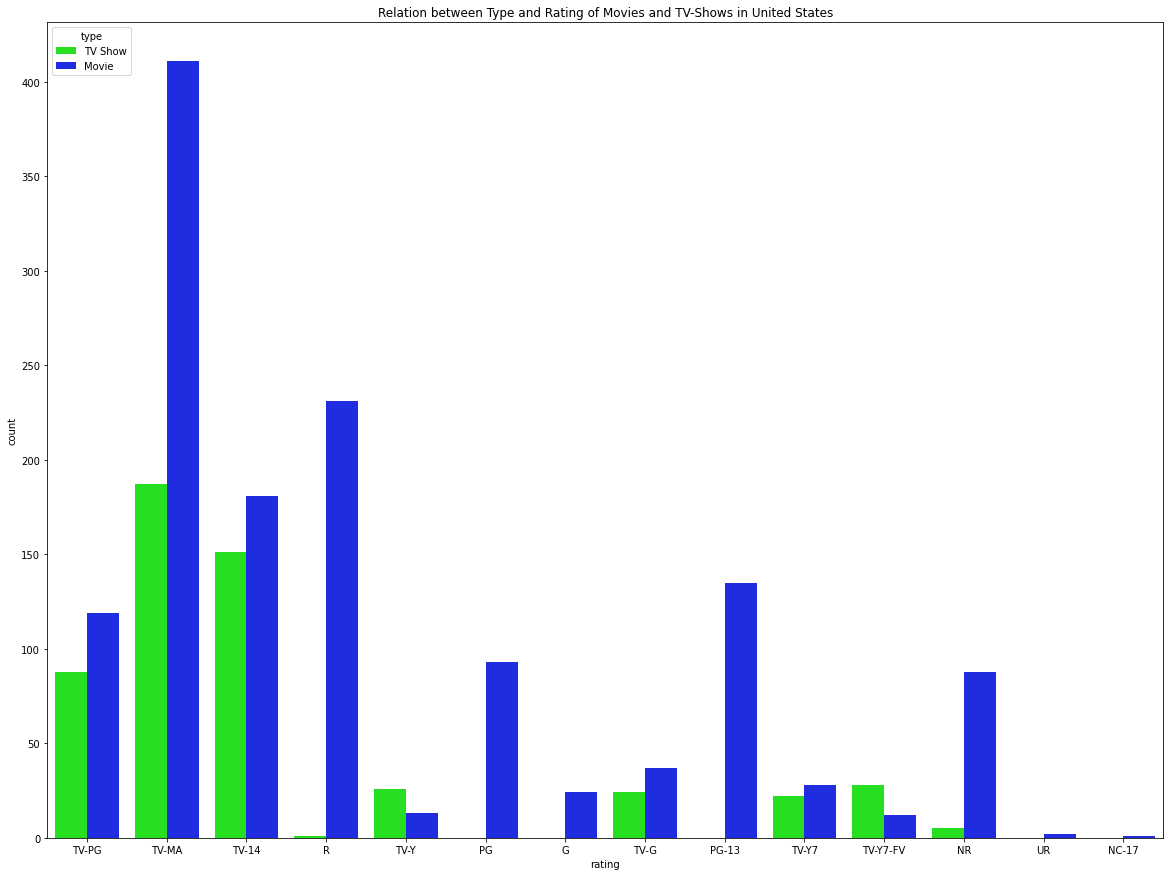

--------------------------------------------------------------------------------------------------------------------------------------------


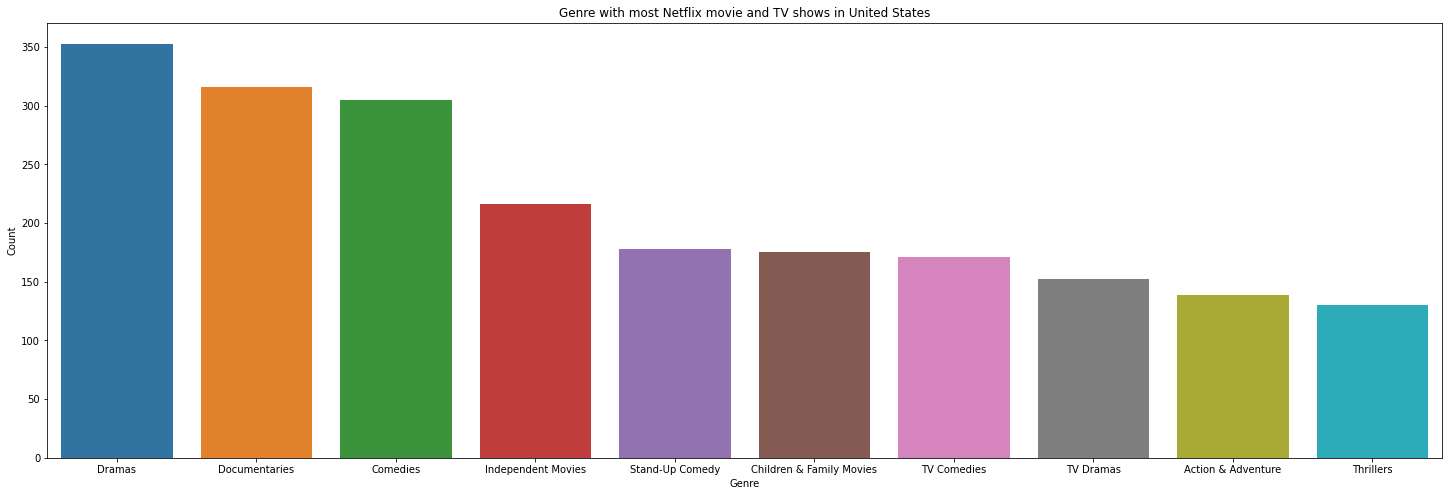

In [48]:
def show_genre(country):
    
    df = Flix_df[(Flix_df['country'] == country)]
    # Create a list of all genre for that specific country
    genre = [x.strip() for x in ','.join(df['listed_in']).split(',')]
    # Create pandas' series using the list of genre
    genre_srs = pd.Series(genre)
    # Get the frequency of each actor using pandas series' value_counts()
    genre_count = genre_srs.value_counts()[:10]
    # Visualize using seaborn's barplot
    #plt.figure(figsize=(14, 8))
    #print(genre_count)
    #print("--------------now printing genre_srs---------------")
    #print(genre_srs)
    #print("---------------genre-------------------------")
    #print(genre)
    plt.figure(figsize=(20,15))
    sns.countplot(x='rating',hue='type',data=df,palette='hsv')
    plt.title('Relation between Type and Rating of Movies and TV-Shows in {}'.format(country))
    plt.show();

    print("--------------------------------------------------------------------------------------------------------------------------------------------")
   
    plt.figure(figsize=(25, 8))
    ax = sns.barplot(x = genre_count.index, y = genre_count)
    
    plt.title('Genre with most Netflix movie and TV shows in ' + country)
    plt.ylabel('Count')
    plt.xlabel('Genre')
   








show_genre('United States')

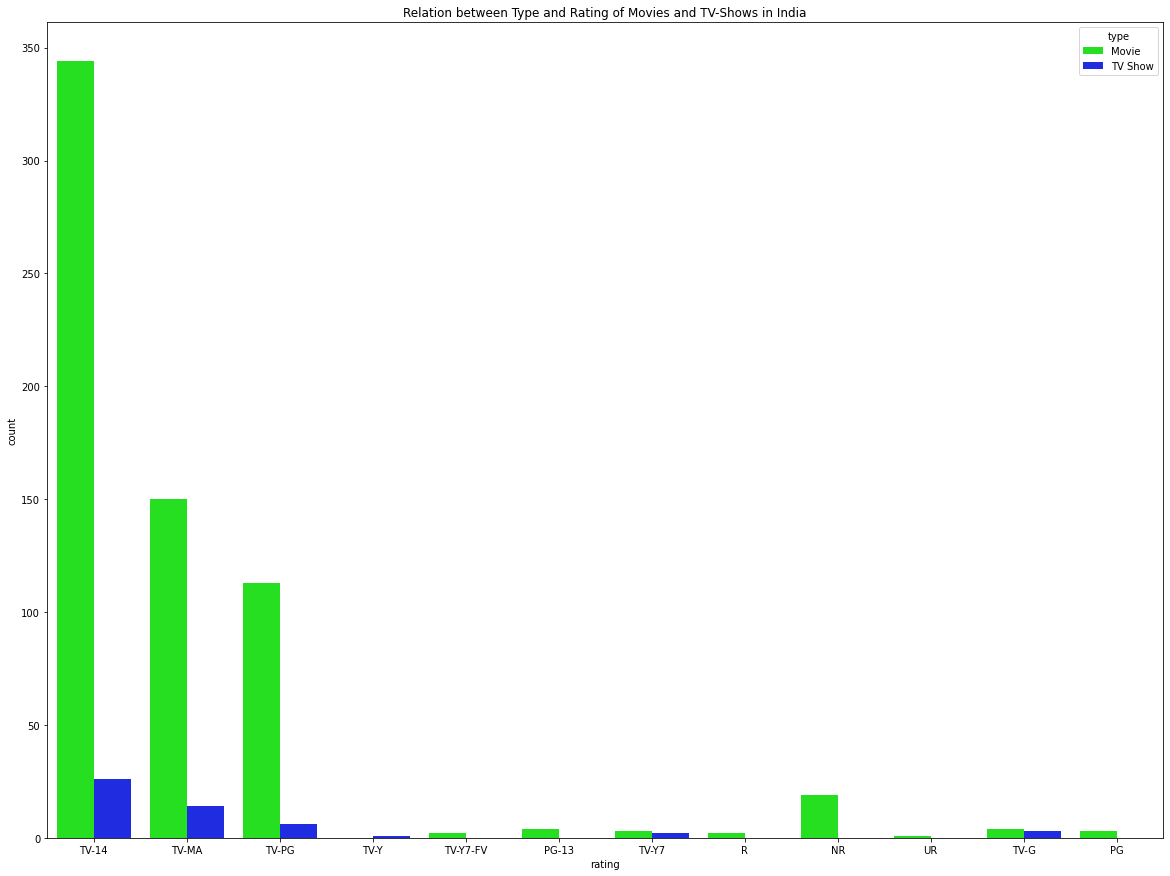

--------------------------------------------------------------------------------------------------------------------------------------------


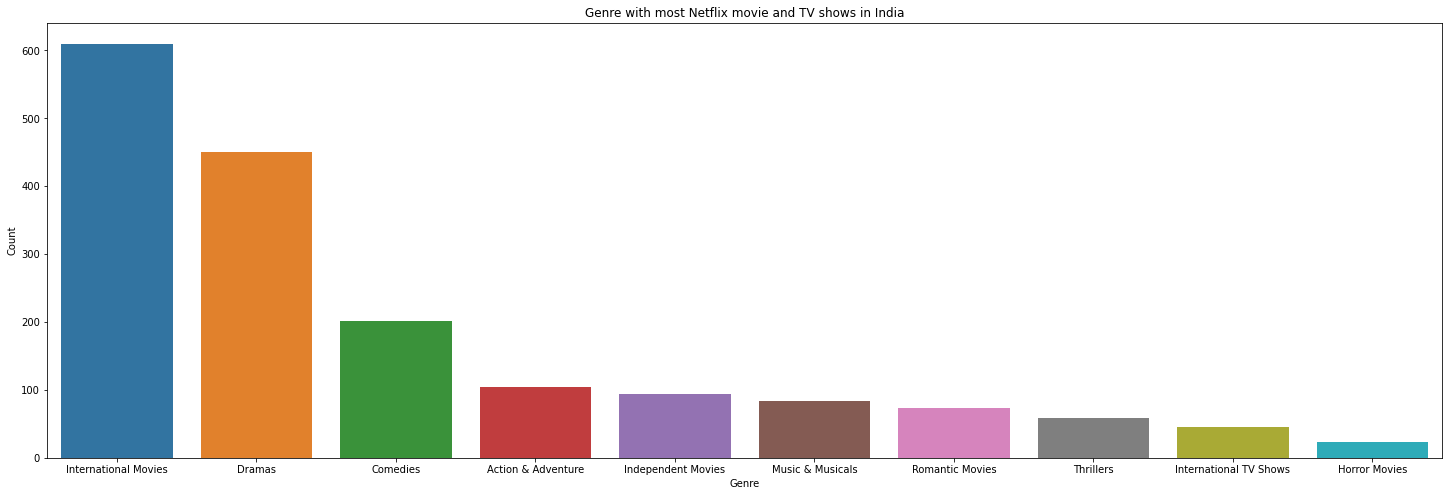

In [49]:
show_genre('India')

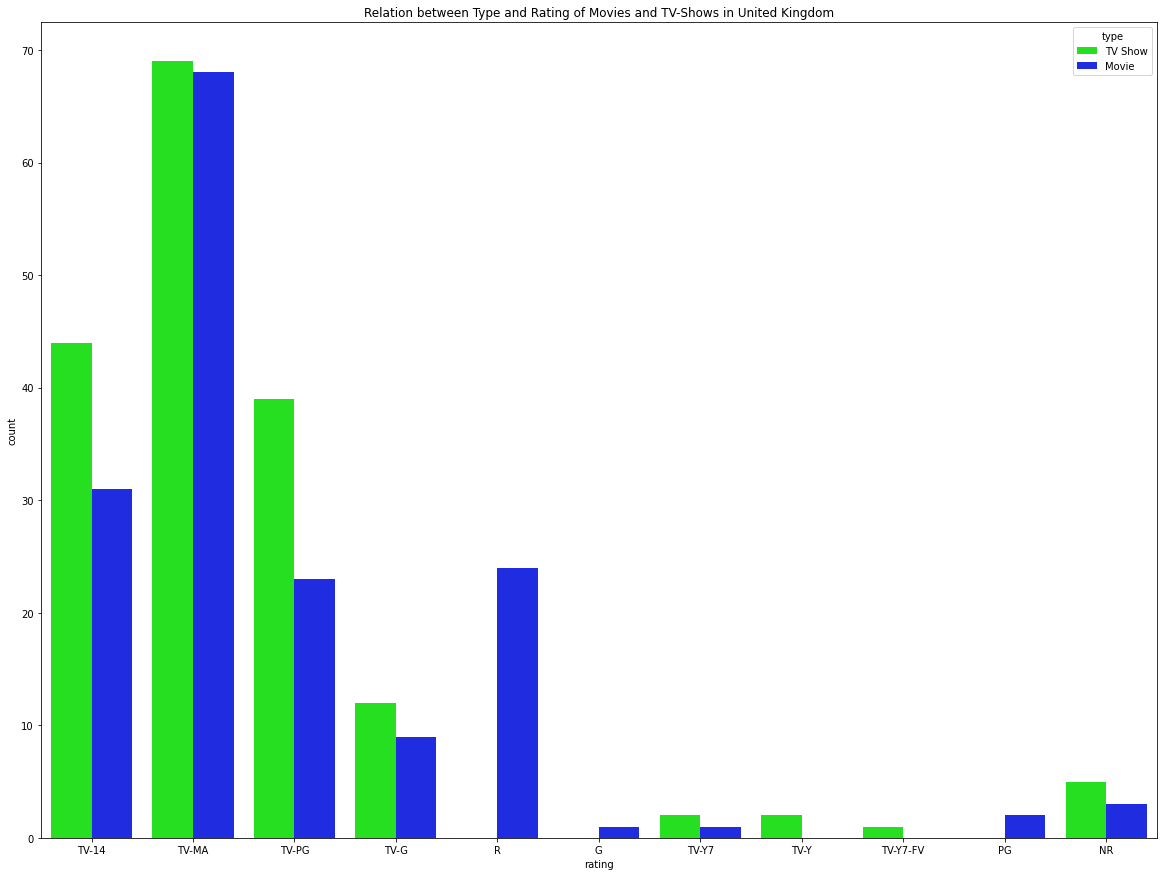

--------------------------------------------------------------------------------------------------------------------------------------------


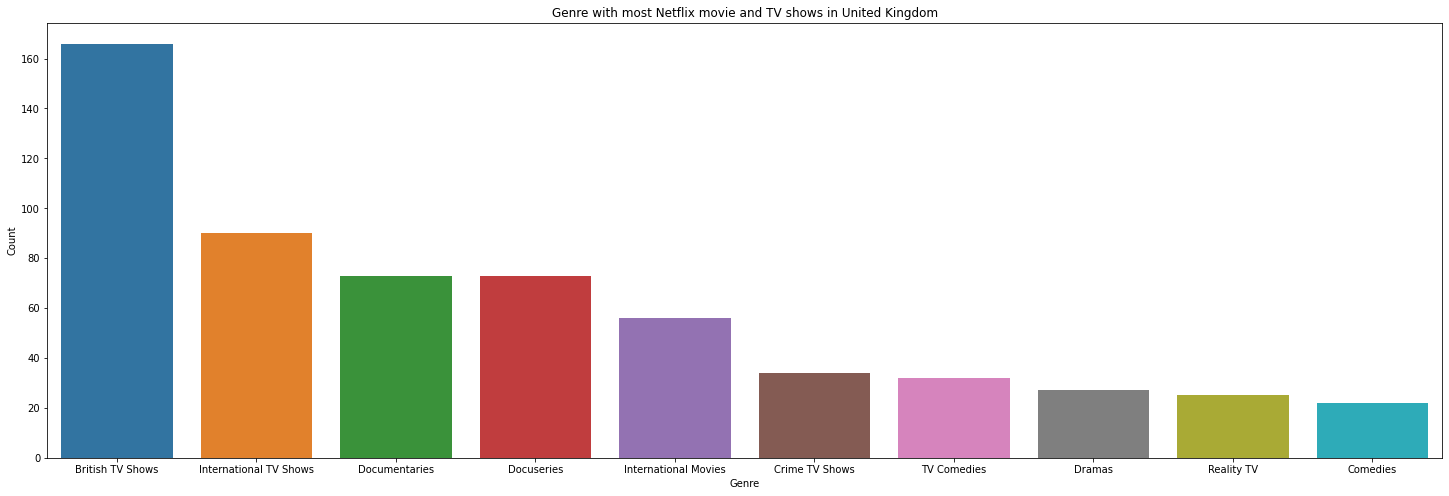

In [50]:
show_genre('United Kingdom')

## **TEXT BASED ANALYSIS - WORD CLOUD**

### TV Show Genre WordCloud

In [51]:
# splitting dataset based on type "TV Show"
Flix_df_TV = Flix_df[Flix_df['type'] == 'TV Show']
tv_genre= Flix_df_TV["listed_in"].str.split(',', expand=True).stack().str.strip().values
#Joining into a single string
text=' '.join(tv_genre)
#len(text)
text[1000:1500]
#text

" TV Comedies TV Dramas International TV Shows TV Dramas Crime TV Shows Docuseries International TV Shows International TV Shows Romantic TV Shows TV Comedies International TV Shows Reality TV Spanish-Language TV Shows International TV Shows TV Dramas Teen TV Shows British TV Shows International TV Shows TV Dramas International TV Shows Romantic TV Shows Reality TV International TV Shows Korean TV Shows Romantic TV Shows Anime Series Teen TV Shows International TV Shows Romantic TV Shows Kids' TV"

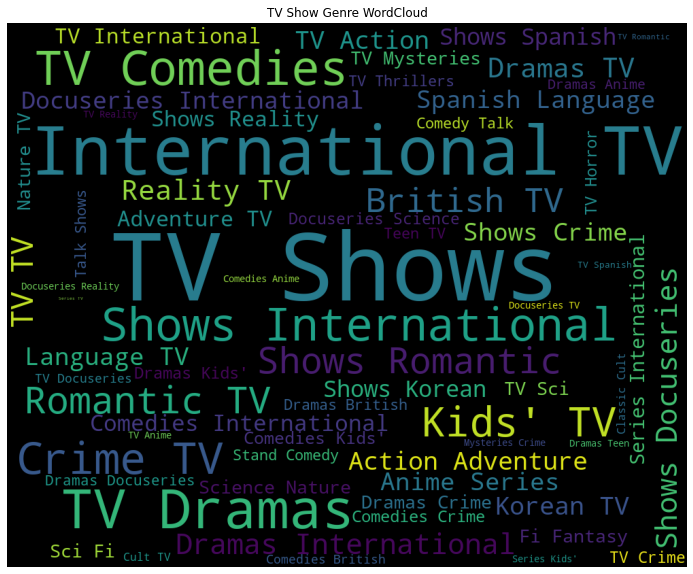

In [52]:
stopwords = STOPWORDS
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
    background_color = 'black',
    stopwords=stopwords,
    height= 800,
    width=1000
).generate(text)
#The imshow() function in pyplot module of matplotlib library is used to display data as an image
plt.imshow(wordcloud)
plt.title('TV Show Genre WordCloud')
plt.axis('off')
plt.show()

### TV Show description WordCloud

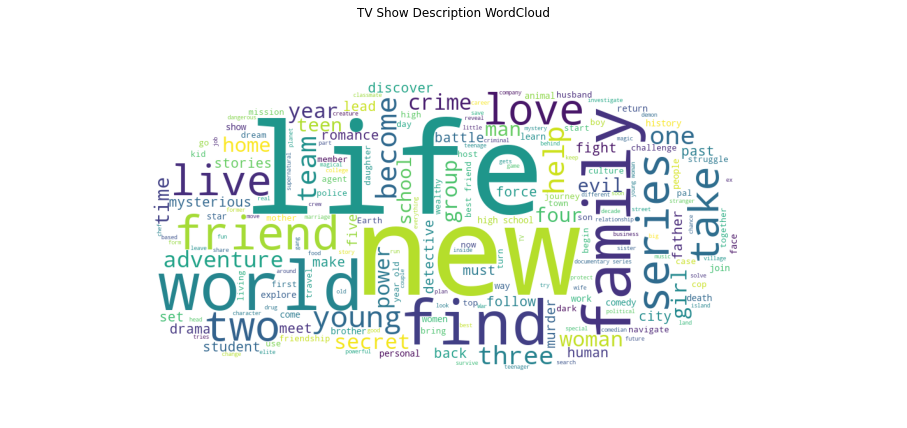

In [56]:
# splitting dataset based on type "TV Show"
Flix_df_TV = Flix_df[Flix_df['type'] == 'TV Show']
tv_desc= Flix_df_TV["description"].str.split(',', expand=True).stack().str.strip().values
text_desc=' '.join(tv_desc)

plt.subplots(figsize=(16,10))
mask = np.array(Image.open('/content/cloud (1).png'))
wordcloud = WordCloud(
    background_color = 'white',
    stopwords=stopwords,
    mask = mask,
).generate(text_desc)
plt.imshow(wordcloud)
plt.title('TV Show Description WordCloud')
plt.axis('off')
plt.show()

### Movie Genre Word Cloud

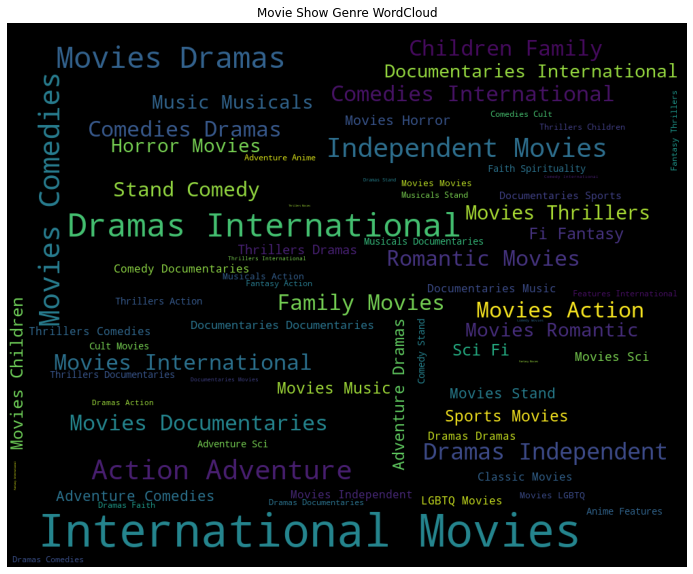

In [57]:
# splitting dataset based on type "Movie"
Flix_df_movie = Flix_df[Flix_df['type'] == 'Movie']
movie_genre= Flix_df_movie["listed_in"].str.split(',', expand=True).stack().str.strip().values
#Joining into a single string
mov_text=' '.join(movie_genre)
stopwords = STOPWORDS
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
    background_color = 'black',
    stopwords=stopwords,
    height= 800,
    width=1000
).generate(mov_text)
plt.imshow(wordcloud)
plt.title('Movie Show Genre WordCloud')
plt.axis('off')
plt.show()

### Movie Description Word Cloud

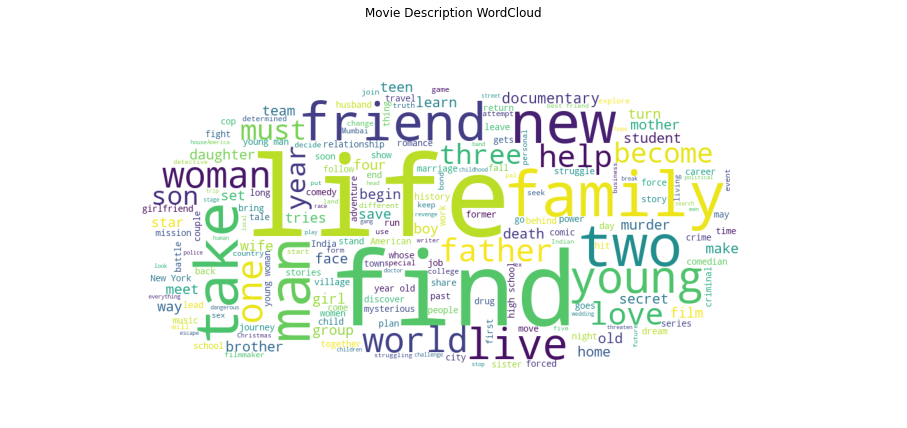

In [58]:
# splitting dataset based on type "Movie"
Flix_df_movie = Flix_df[Flix_df['type'] == 'Movie']
movie_desc= Flix_df_movie["description"].str.split(',', expand=True).stack().str.strip().values
mov_text_desc=' '.join(movie_desc)

plt.subplots(figsize=(16,10))
mask = np.array(Image.open('/content/cloud (1).png'))
wordcloud = WordCloud(
    background_color = 'white',
    stopwords=stopwords,
    mask = mask,
).generate(mov_text_desc)
plt.imshow(wordcloud)
plt.title('Movie Description WordCloud')
plt.axis('off')
plt.show()